1.Data Cleaning:

importing the python packages 

In [2143]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from skimpy import clean_columns
import matplotlib.pyplot as plt





importing csv file as a dataframe

In [2144]:
df1 = pd.read_csv("Immo_Sale_14_01_2023_12_28_60.csv")
df1.head()



,ID,Locality,Sale_rent,Zipcode,Building condition,Price,Kitchen type,Living area,Furnished,Surface of the plot,Number of frontages,Swimming pool,Bedrooms,Garden,Garden surface,Terrace,Terrace surface,Type of property
0,10329506,chaumont-gistoux,for-sale,1325,False,640000,True,175 m² square meters,True,0,0,False,4,False,0,True,40 m² square meters,Apartment
1,10329697,bruxelles,for-sale,1000,False,640000,True,145 m² square meters,False,0,0,False,4,False,0,True,40 m² square meters,Apartment
2,10329155,evere,for-sale,1140,False,640000,True,330 m² square meters,False,0,0,False,4,False,0,True,9 m² square meters,Apartment
3,10329085,wavre,for-sale,1300,True,485000,True,160 m² square meters,False,868 m² square meters,4,False,4,True,868 m² square meters,True,2 m² square meters,Mixed-use building
4,10329086,kraainem,for-sale,1950,True,640000,True,150 m² square meters,False,524 m² square meters,4,False,4,True,400 m² square meters,True,15 m² square meters,Mixed-use building


In [2145]:
df1.dtypes

ID                      int64
Locality               object
Sale_rent              object
Zipcode                 int64
Building condition       bool
Price                   int64
Kitchen type             bool
Living area            object
Furnished                bool
Surface of the plot    object
Number of frontages     int64
Swimming pool            bool
Bedrooms                int64
Garden                   bool
Garden surface         object
Terrace                  bool
Terrace surface        object
Type of property       object
dtype: object

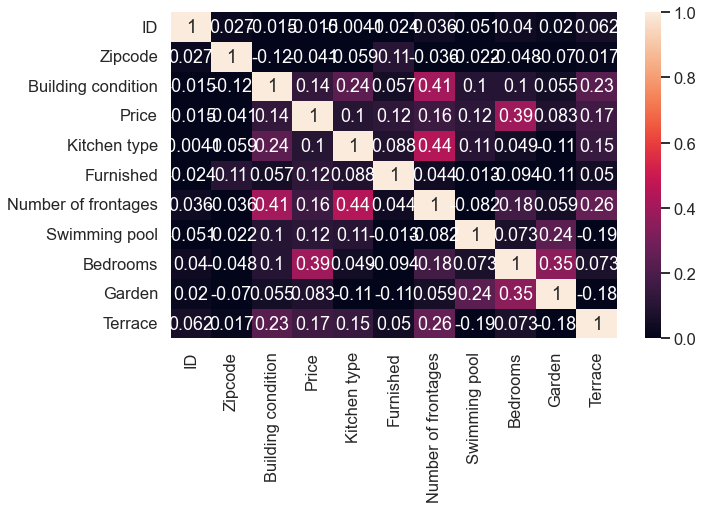

In [2146]:
#the correlation matrix to check corrilation between the variables:
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, vmin=0, vmax=1,annot=True)
plt.savefig('heatmap1.png')
plt.show()

1) cleaning the duplicates
2) Removing rows with missing values
3) Removing meter square
4) Removing the colums not required for my analysis

Cleaned duplicates, deleted unwanted details in the dataset and columns

In [2147]:
# No duplicates
df1.drop_duplicates()
#detleted 'square meters' from Living area, Surface of the plot, Garden surface. Terrace surface.
df1['Living area'] = df1['Living area'].str.replace('m² square meters', '')
df1['Living area'] = df1['Living area'].str.replace('m² square meter', '')
#column deleted which are not useful
df1.drop('Surface of the plot', axis=1, inplace=True)
df1.drop('Number of frontages', axis=1, inplace=True)
df1.drop('Swimming pool', axis=1, inplace=True)
df1.drop('Garden surface', axis=1, inplace=True)
df1.drop('Terrace surface', axis=1, inplace=True)
df1.drop('Sale_rent', axis=1, inplace=True)
df1.drop('ID', axis=1, inplace=True)
df1.drop('Furnished', axis=1, inplace=True)
#No blank spaces:  Deleteing the rows with ALL Nan values
df1.dropna(how='all') 
df1.head()


,Locality,Zipcode,Building condition,Price,Kitchen type,Living area,Bedrooms,Garden,Terrace,Type of property
0,chaumont-gistoux,1325,False,640000,True,175,4,False,True,Apartment
1,bruxelles,1000,False,640000,True,145,4,False,True,Apartment
2,evere,1140,False,640000,True,330,4,False,True,Apartment
3,wavre,1300,True,485000,True,160,4,True,True,Mixed-use building
4,kraainem,1950,True,640000,True,150,4,True,True,Mixed-use building


In [2148]:
df1['Locality'] = df1['Locality'].astype('string')
df1['Type of property'] = df1['Type of property'].astype('string')
df1['Price'] = pd.to_numeric(df1['Price'])

In [2149]:
from skimpy import clean_columns
df1 = clean_columns(df1)
df1.head(3)

10 column names have been cleaned

,locality,zipcode,building_condition,price,kitchen_type,living_area,bedrooms,garden,terrace,type_of_property
0,chaumont-gistoux,1325,False,640000,True,175,4,False,True,Apartment
1,bruxelles,1000,False,640000,True,145,4,False,True,Apartment
2,evere,1140,False,640000,True,330,4,False,True,Apartment


In [2150]:
#Defineing the province(creating the col province)
#These provinces are Antwerp,Brussel, Brabant, West Flanders, East Flanders, Hainaut, Liège, Limburg, Luxembourg, Namur
df1["provinces"] = df1["zipcode"]
df1['provinces'] = np.where(df1['zipcode'].between(2000,2999), "Antwerp", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(1000,1299), "Brussel", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(1300,1499), "Wallon-Brabant", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(1500,1999), "Vlaams-Brabant", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(3000,3499), "Vlaams-Brabant", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(8000,8999), "W.Flanders", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(9000,9999), "E.Fanders", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(7000,7999), "Hainaut", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(6000,6599), "Hainaut", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(4000,4999), "Liege", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(3500,3999), "Limbourg", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(6600,6999), "Luxembourg", df1['provinces'])
df1['provinces'] = np.where(df1['zipcode'].between(5000,5680), "Namur", df1['provinces'])



df1.head()

,locality,zipcode,building_condition,price,kitchen_type,living_area,bedrooms,garden,terrace,type_of_property,provinces
0,chaumont-gistoux,1325,False,640000,True,175,4,False,True,Apartment,Wallon-Brabant
1,bruxelles,1000,False,640000,True,145,4,False,True,Apartment,Brussel
2,evere,1140,False,640000,True,330,4,False,True,Apartment,Brussel
3,wavre,1300,True,485000,True,160,4,True,True,Mixed-use building,Wallon-Brabant
4,kraainem,1950,True,640000,True,150,4,True,True,Mixed-use building,Vlaams-Brabant


In [2151]:

df = pd.DataFrame(df1)


In [2152]:
df.head()

,locality,zipcode,building_condition,price,kitchen_type,living_area,bedrooms,garden,terrace,type_of_property,provinces
0,chaumont-gistoux,1325,False,640000,True,175,4,False,True,Apartment,Wallon-Brabant
1,bruxelles,1000,False,640000,True,145,4,False,True,Apartment,Brussel
2,evere,1140,False,640000,True,330,4,False,True,Apartment,Brussel
3,wavre,1300,True,485000,True,160,4,True,True,Mixed-use building,Wallon-Brabant
4,kraainem,1950,True,640000,True,150,4,True,True,Mixed-use building,Vlaams-Brabant


Analysing the data and all the coloums need for my analysis.

In [2153]:
df1.type_of_property.value_counts()

Apartment             1831
House                 1181
Mixed-use building     564
Mansion                 24
Bungalow                 6
Castle                   2
Chalet                   1
Name: type_of_property, dtype: Int64

In [2154]:
df.zipcode.value_counts()

2170    144
1000    136
3000    133
1180    126
2220    120
       ... 
9900      1
6238      1
2390      1
3941      1
3128      1
Name: zipcode, Length: 488, dtype: int64

In [2155]:
df.price.value_counts(ascending=False)

320000     155
339000     141
425000     130
229000     107
435000     104
          ... 
796000       1
860000       1
1165000      1
1225000      1
143000       1
Name: price, Length: 515, dtype: int64

In [2156]:
df.provinces.value_counts

<bound method IndexOpsMixin.value_counts of 0       Wallon-Brabant
1              Brussel
2              Brussel
3       Wallon-Brabant
4       Vlaams-Brabant
             ...      
3604           Antwerp
3605           Antwerp
3606        W.Flanders
3607        W.Flanders
3608        W.Flanders
Name: provinces, Length: 3609, dtype: object>

Step2: Data Analysis

In [2157]:
#How many rows and columns?
#What is the correlation between the variables and the price? (Why might that be?)
#How are variables correlated to each other? (Why?)
#Which variables have the greatest influence on the price?
#Which variables have the least influence on the price?
#How many qualitative and quantitative variables are there? How would you transform these values into numerical values?
#What is the percentage of missing values per column?

In [2158]:
df.shape

(3609, 11)

In [2159]:
df['price'].corr(df['bedrooms'])

0.39091529956650906

Heat Map

In [2160]:
df1.corr()

,zipcode,building_condition,price,kitchen_type,bedrooms,garden,terrace
zipcode,1.00,-0.12,-0.04,-0.06,-0.05,-0.07,0.02
building_condition,-0.12,1.00,0.14,0.24,0.10,0.05,0.23
price,-0.04,0.14,1.00,0.10,0.39,0.08,0.17
kitchen_type,-0.06,0.24,0.10,1.00,0.05,-0.11,0.15
bedrooms,-0.05,0.10,0.39,0.05,1.00,0.35,0.07
garden,-0.07,0.05,0.08,-0.11,0.35,1.00,-0.18
terrace,0.02,0.23,0.17,0.15,0.07,-0.18,1.00


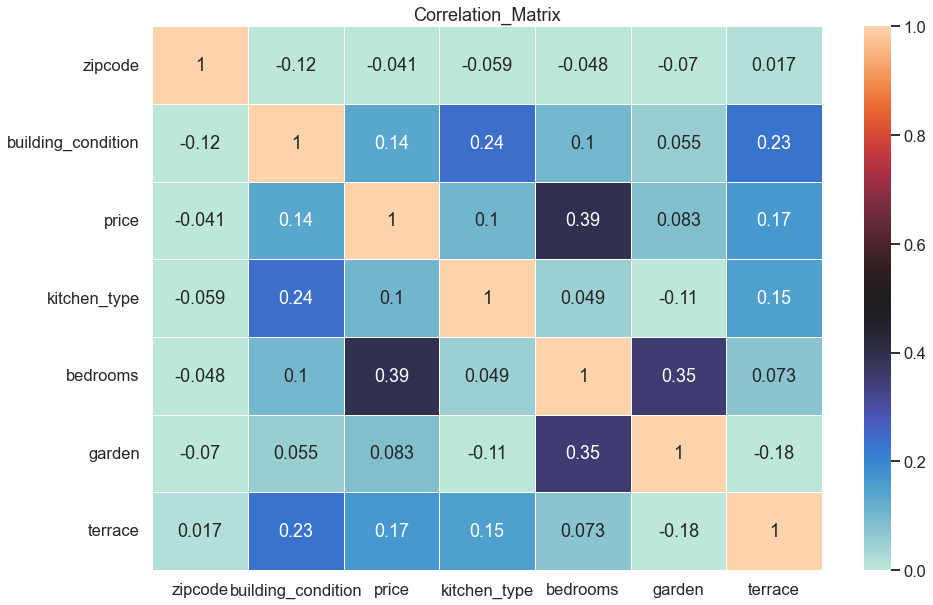

In [2161]:
import seaborn as sns
#Heat map 

#plot data matrix
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), vmin=-0, vmax=1, annot=True, linewidths=.5, center=0.5)
plt.title("Correlation_Matrix")
plt.savefig('heatmap.png')
plt.show()

Here, we can visualize the variables that have a high influence on the price. 

Step 3: Data Interpretation

In [2162]:
#Plot the outliers.
#Which variables would you delete and why ?
#Represent the number of properties according to their surface using a histogram.
#In your opinion, which 5 variables are the most important and why?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   locality            3609 non-null   string
 1   zipcode             3609 non-null   int64 
 2   building_condition  3609 non-null   bool  
 3   price               3609 non-null   int64 
 4   kitchen_type        3609 non-null   bool  
 5   living_area         3609 non-null   object
 6   bedrooms            3609 non-null   int64 
 7   garden              3609 non-null   bool  
 8   terrace             3609 non-null   bool  
 9   type_of_property    3609 non-null   string
 10  provinces           3609 non-null   object
dtypes: bool(4), int64(3), object(2), string(2)
memory usage: 211.6+ KB


In [2163]:
df.corr().price

zipcode              -0.04
building_condition    0.14
price                 1.00
kitchen_type          0.10
bedrooms              0.39
garden                0.08
terrace               0.17
Name: price, dtype: float64

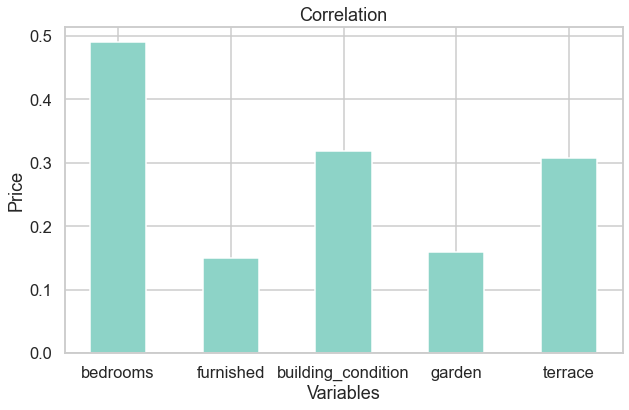

In [2164]:
# Checking variables impact on the price

variables = ['bedrooms', 'furnished', 'building_condition', 'garden', 'terrace']
correlations = [0.49, 0.15, 0.319, 0.16, 0.308]

# create the chart
fig, ax = plt.subplots()
ax.bar(variables, correlations, width=0.5, bottom=0, align='center', tick_label=variables)
plt.title("Correlation")
plt.xlabel("Variables")
plt.ylabel("Price")
plt.show()

price comparision between provinces

In [2165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   locality            3609 non-null   string
 1   zipcode             3609 non-null   int64 
 2   building_condition  3609 non-null   bool  
 3   price               3609 non-null   int64 
 4   kitchen_type        3609 non-null   bool  
 5   living_area         3609 non-null   object
 6   bedrooms            3609 non-null   int64 
 7   garden              3609 non-null   bool  
 8   terrace             3609 non-null   bool  
 9   type_of_property    3609 non-null   string
 10  provinces           3609 non-null   object
dtypes: bool(4), int64(3), object(2), string(2)
memory usage: 211.6+ KB


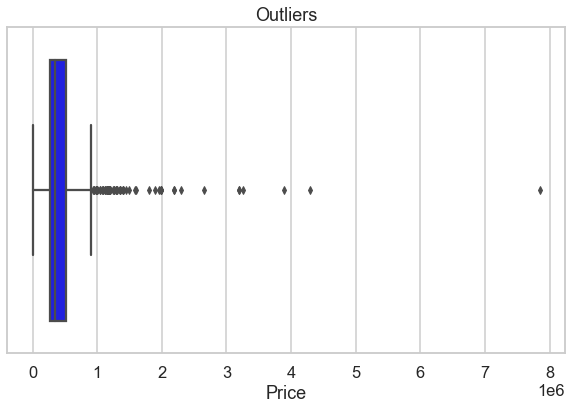

In [2166]:
#checking the outliers
import seaborn
len_sample=1000
df_sample = df.sample(len_sample)
# Create a box plot of the 'Price' column
sns.boxplot(x=df_sample['price'], color='blue')

# Add title and x-axis label
plt.title(f"Outliers")
plt.xlabel('Price')
plt.savefig('boxplot.png')

# Show plot
plt.show()

In [2167]:
#Which variables would you delete and why ?
#Variables deleted on the basis of my question and requirements.
#Represent the number of properties according to their surface using a histogram.


In [2168]:
df["avg"] = df.groupby('zipcode',sort=False)['price'].transform('mean')
df["mean"] = df.groupby('zipcode',sort=False)['price'].transform('mean')
df["med"] = df.groupby('zipcode',sort=False)['price'].transform('median')

In [2169]:
df.head()

,locality,zipcode,building_condition,price,kitchen_type,living_area,bedrooms,garden,terrace,type_of_property,provinces,avg,mean,med
0,chaumont-gistoux,1325,False,640000,True,175,4,False,True,Apartment,Wallon-Brabant,427250.00,427250.00,457500.00
1,bruxelles,1000,False,640000,True,145,4,False,True,Apartment,Brussel,501674.63,501674.63,402500.00
2,evere,1140,False,640000,True,330,4,False,True,Apartment,Brussel,376541.30,376541.30,350000.00
3,wavre,1300,True,485000,True,160,4,True,True,Mixed-use building,Wallon-Brabant,309998.86,309998.86,298076.00
4,kraainem,1950,True,640000,True,150,4,True,True,Mixed-use building,Vlaams-Brabant,821692.31,821692.31,625000.00


In [2170]:
test_data = pd.DataFrame()
test_data['provinces'] =df["provinces"]
test_data['mean'] =df["mean"]



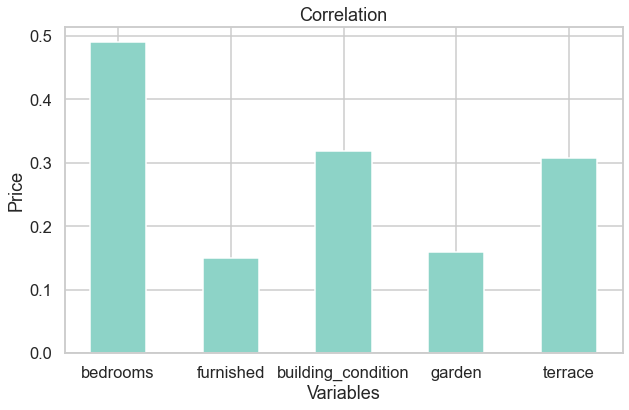

In [2171]:
# Checking variables impact on the price

variables = ['bedrooms', 'furnished', 'building_condition', 'garden', 'terrace']
correlations = [0.49, 0.15, 0.319, 0.16, 0.308]

# create the chart
fig, ax = plt.subplots()
ax.bar(variables, correlations, width=0.5, bottom=0, align='center', tick_label=variables)
plt.title("Correlation")
plt.xlabel("Variables")
plt.ylabel("Price")
plt.show()

In [2172]:
df=df[(df.price>100000) & (df.price <1000000)]

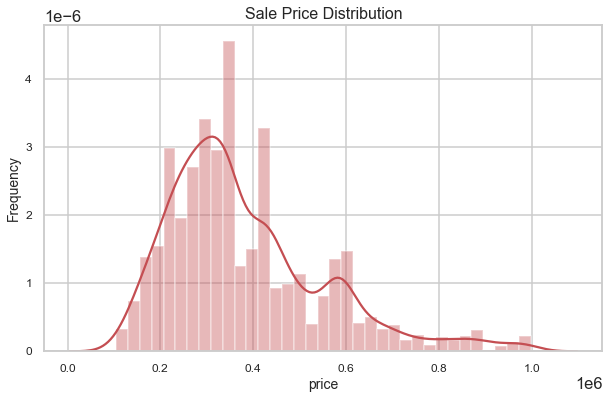

In [2173]:
#the price distribution using displot
sns.distplot(df['price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

2 Questions:

1. Comparing which type of property is expensive as per provinces ?

In [2177]:
df.type_of_property.value_counts()

Apartment             1646
House                 1101
Mixed-use building     509
Mansion                 23
Bungalow                 5
Chalet                   1
Name: type_of_property, dtype: Int64

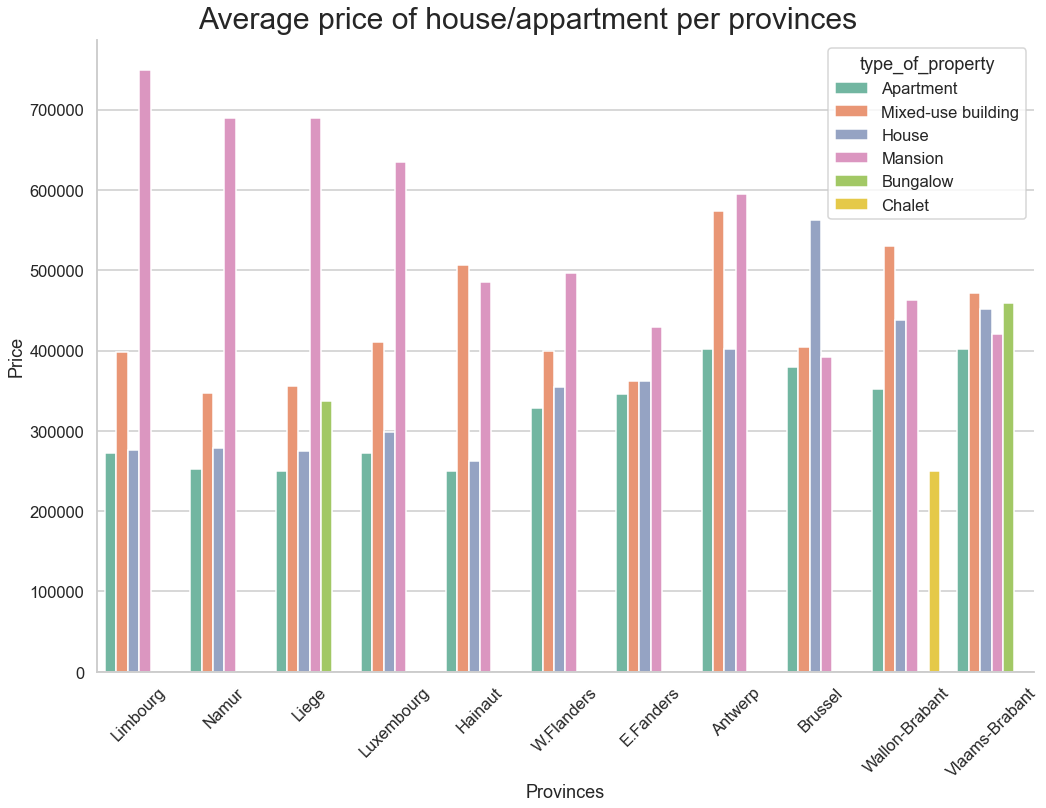

In [2183]:
#more general plot for median price per provinces with and without garden
sorte = df.groupby('provinces')["price"].median().reset_index().sort_values('price')
sns.set_context("talk")
pale = sns.color_palette("Set2")
sns.set_palette(pale)
test = sns.catplot(data=df,x="provinces",y="price",hue="type_of_property", kind="bar",errorbar=None,estimator=np.mean,order=sorte['provinces'],height=10,aspect=1.5,legend = False)
test.set(ylabel= "Price", xlabel="Provinces")
plt.legend(title='type_of_property', loc='upper right')

#rotation of categories
plt.xticks(rotation=45)
#give a title to the plot
test.fig.suptitle("Average price of house/appartment per provinces",y=1.02, size=30)
plt.savefig('catplot.png')

2) does living area impact the price of the property type?

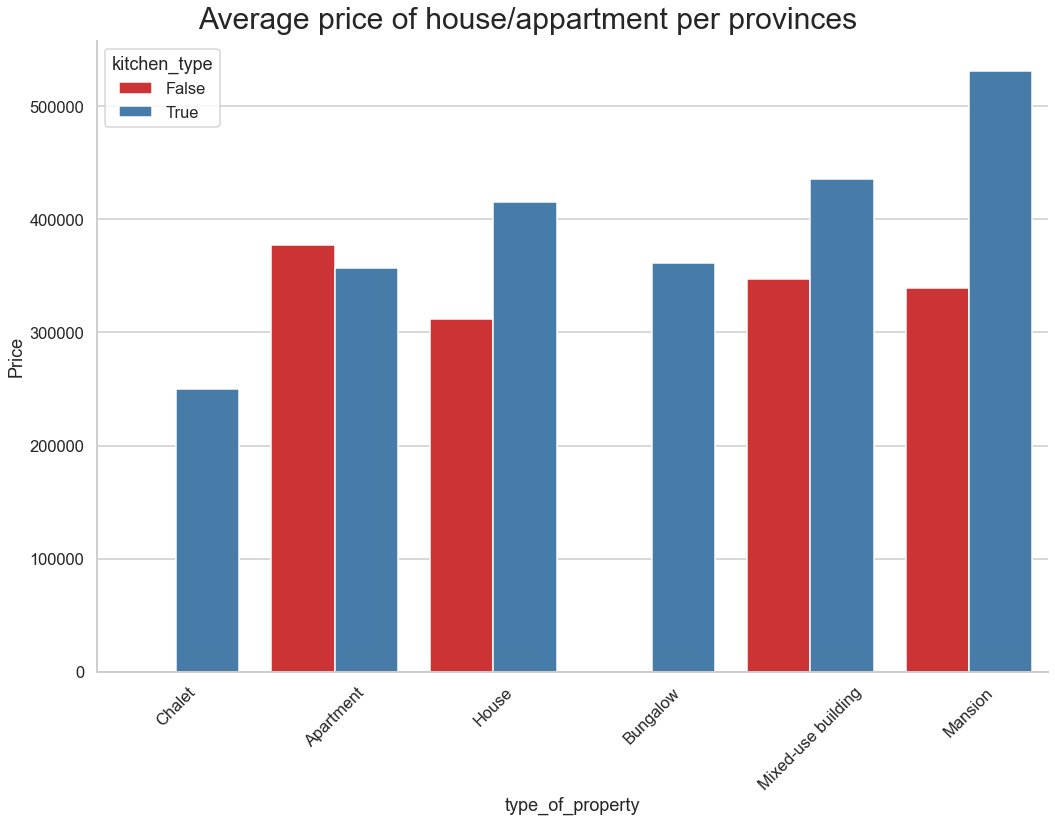

In [2189]:
#more general plot for median price per provinces with and without garden
sorte = df.groupby('type_of_property')["price"].median().reset_index().sort_values('price')
sns.set_context("talk")
pale = sns.color_palette("Set1")
sns.set_palette(pale)
test = sns.catplot(data=df,x="type_of_property",y="price",hue="kitchen_type", kind="bar",errorbar=None,estimator=np.mean,order=sorte['type_of_property'],height=10,aspect=1.5,legend = False)
test.set(ylabel= "Price", xlabel="type_of_property")
plt.legend(title='kitchen_type', loc='upper left')

#rotation of categories
plt.xticks(rotation=45)
#give a title to the plot
test.fig.suptitle("Average price of house/appartment per provinces",y=1.02, size=30)
plt.savefig('catplot.png')

#Kitchen type: True value carries: installed, equipped, semi installed etc all the kitchen
# False: not installed, no value, etc.